In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pypalettes import load_cmap

# Import data and write function

In [2]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/6hourly_efp/1958_2016/efp_results.json'
with open(data_path) as f:
    data_6h_58 = json.load(f)

In [3]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/6hourly_efp/1979_2016/efp_results.json'
with open(data_path) as f:
    data_6h_79 = json.load(f)

In [4]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/daily_efp/1958_2016/efp_results.json'
with open(data_path) as f:
    data_daily_58 = json.load(f)

In [5]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/daily_efp/1979_2016/efp_results.json'
with open(data_path) as f:
    data_daily_79 = json.load(f)

In [6]:
import matplotlib.pyplot as plt
from pypalettes import load_cmap

def plot_combined_efp_annual_cycle(data_6h, data_daily, time_period="1958–2016"):
    """
    Plot EFP annual cycles for 6-hourly & daily data in both hemispheres
    (two columns: NH, SH), with daily shown as dashed lines.
    """

    # mapping month number to letter
    month_map = {
        1: 'J', 2: 'F', 3: 'M', 4: 'A', 5: 'M', 6: 'J',
        7: 'J', 8: 'A', 9: 'S', 10: 'O', 11: 'N', 12: 'D'
    }

    # desired order starting from July
    month_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
    month_to_july_idx = {m: i for i, m in enumerate(month_order)}

    sh_files = ['efp_sh', 'efp_sh_gt3', 'efp_sh_123']
    nh_files = ['efp_nh', 'efp_nh_gt3', 'efp_nh_123']

    # load highcontrast colormap
    cmap = load_cmap("highcontrast")

    # create 1x2 figure (NH, SH)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    hemispheres = [
        (sh_files, 'Southern Hemisphere'),
        (nh_files, 'Northern Hemisphere')
    ]

    for ax, (files, hemi) in zip(axes, hemispheres):
        colors = cmap.colors[:len(files)]  # enough colors for lines

        for efp_file, color in zip(files, colors):
            # --- Plot 6-hourly ---
            efp_data_6h = data_6h[efp_file]
            months_6h, efps_6h = [], []
            for season, info in efp_data_6h.items():
                central_month = info['months'][1]
                months_6h.append(central_month)
                efps_6h.append(info['efp'])
            months_july_6h = [month_to_july_idx[m] for m in months_6h]
            sorted_data_6h = sorted(zip(months_july_6h, efps_6h))
            months_sorted_6h, efps_sorted_6h = zip(*sorted_data_6h)

            ax.plot(
                months_sorted_6h, efps_sorted_6h, marker='o', linewidth=2,
                color=color, label=f'{efp_file} (6-hourly)'
            )

            # --- Plot Daily (dashed) ---
            efp_data_daily = data_daily[efp_file]
            months_d, efps_d = [], []
            for season, info in efp_data_daily.items():
                central_month = info['months'][1]
                months_d.append(central_month)
                efps_d.append(info['efp'])
            months_july_d = [month_to_july_idx[m] for m in months_d]
            sorted_data_d = sorted(zip(months_july_d, efps_d))
            months_sorted_d, efps_sorted_d = zip(*sorted_data_d)

            ax.plot(
                months_sorted_d, efps_sorted_d, marker='o', linewidth=2,
                color=color, linestyle='--', label=f'{efp_file} (Daily)'
            )

        ax.set_xticks(range(12))
        ax.set_xticklabels([month_map[m] for m in month_order])
        ax.set_xlabel('Month')
        ax.set_title(hemi)
        ax.grid(True, axis='y')
        ax.legend(handlelength=4)

    axes[0].set_ylabel('EFP')
    axes[0].set_ylim(0, 0.5)
    fig.suptitle(f'Reanalysis EFP Annual Cycles: 6-hourly vs Daily ({time_period})', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()


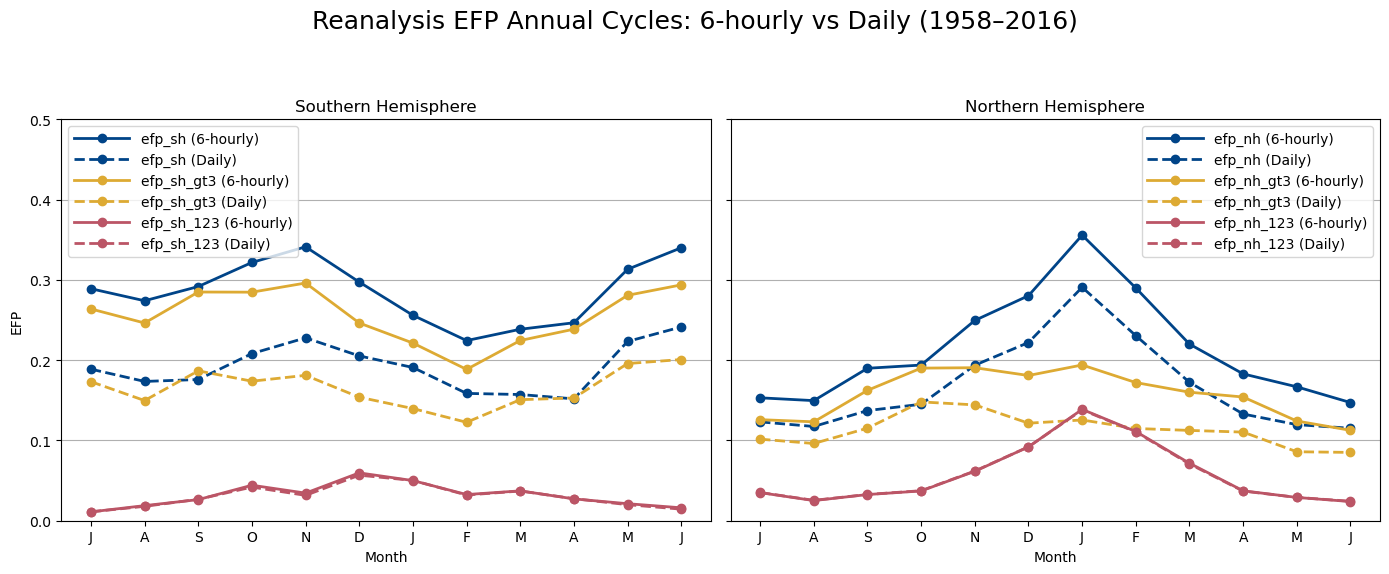

In [7]:
plot_combined_efp_annual_cycle(data_6h_58, data_daily_58, time_period="1958–2016")

## 1979-2016

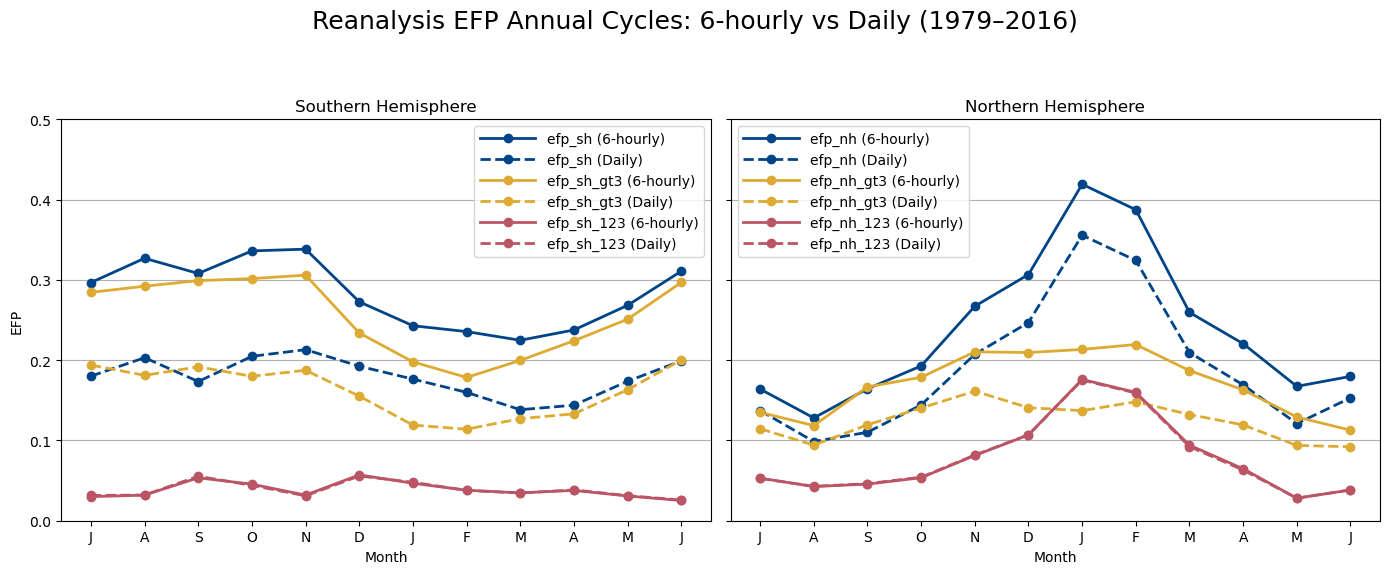

In [8]:
plot_combined_efp_annual_cycle(data_6h_79, data_daily_79, time_period="1979–2016")

---

# Separate time frequencies

In [9]:
def plot_efp_annual_cycle(data, time_period="1958-2016", time_frequency="6-hourly"):
    """
    Plot EFP annual cycles for given data and settings.

    Parameters
    ----------
    data : dict
        Dictionary of EFP data (e.g., data_6h_58 in your example).
    time_period : str
        String describing the time period (e.g., '1958-2016') to display in the title.
    time_frequency : str
        '6-hourly' or 'daily', used in the title.
    """

    # mapping month number to letter
    month_map = {
        1: 'J', 2: 'F', 3: 'M', 4: 'A', 5: 'M', 6: 'J',
        7: 'J', 8: 'A', 9: 'S', 10: 'O', 11: 'N', 12: 'D'
    }

    # desired order starting from July
    month_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
    month_to_july_idx = {m: i for i, m in enumerate(month_order)}

    sh_files = ['efp_sh', 'efp_sh_123', 'efp_sh_gt3']
    nh_files = ['efp_nh', 'efp_nh_123', 'efp_nh_gt3']

    # load highcontrast colormap
    cmap = load_cmap("highcontrast")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    for ax, files, hemi in zip(axes, [sh_files, nh_files], ['Southern Hemisphere', 'Northern Hemisphere']):
        colors = cmap.colors[:len(files)]  # take as many colors as needed

        for efp_file, color in zip(files, colors):
            efp_data = data[efp_file]

            months = []
            efps = []

            # extract central months and efp values
            for season, info in efp_data.items():
                central_month = info['months'][1]  # middle month
                months.append(central_month)
                efps.append(info['efp'])

            # map months to July-based index
            months_july = [month_to_july_idx[m] for m in months]

            # sort by July-based index
            sorted_data = sorted(zip(months_july, efps))
            months_july_sorted, efps_sorted = zip(*sorted_data)

            # plot line
            ax.plot(
                months_july_sorted, efps_sorted, marker='o', linewidth=2,
                label=efp_file, color=color
            )

        ax.set_xticks(range(12))
        ax.set_xticklabels([month_map[m] for m in month_order])
        ax.set_xlabel('Month')
        ax.set_title(f'{hemi}')
        ax.grid(True, axis='y')
        ax.legend()

    axes[0].set_ylabel('EFP')
    axes[0].set_ylim(0, 0.5)

    fig.suptitle(f'EFP Annual Cycles: {time_frequency.capitalize()} Data ({time_period})', fontsize=16)
    plt.tight_layout()
    plt.show()


# 6-hourly
## 1958-2016

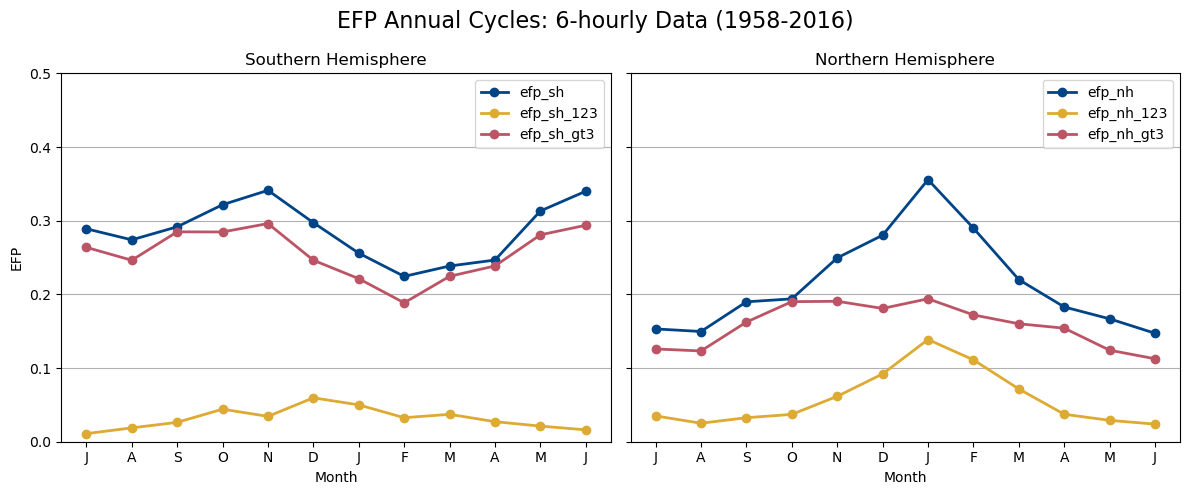

In [10]:
plot_efp_annual_cycle(data_6h_58)

## 1979-2016

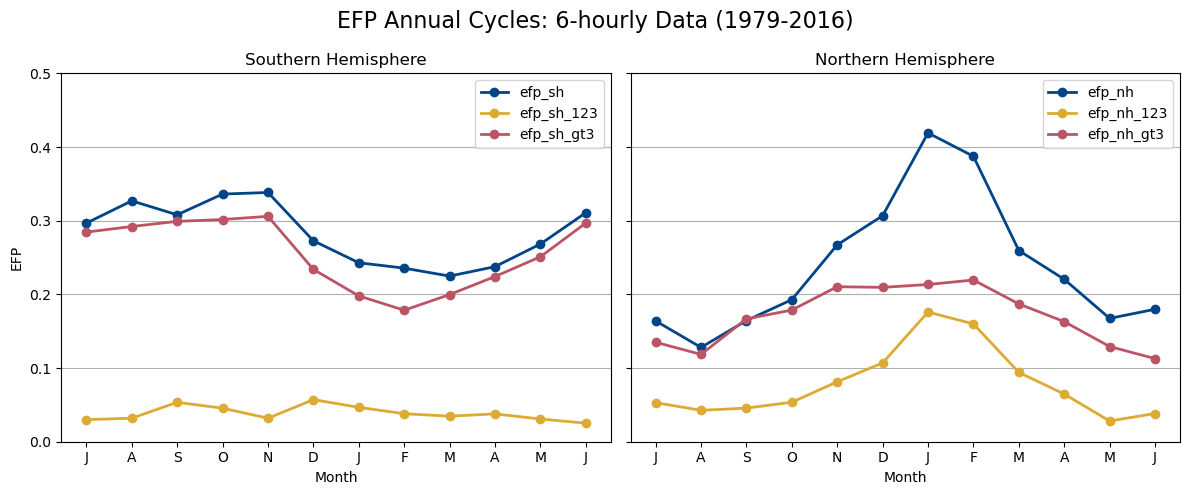

In [11]:
plot_efp_annual_cycle(data_6h_79, time_period="1979-2016", time_frequency="6-hourly")

# Daily data

## 1958-2016

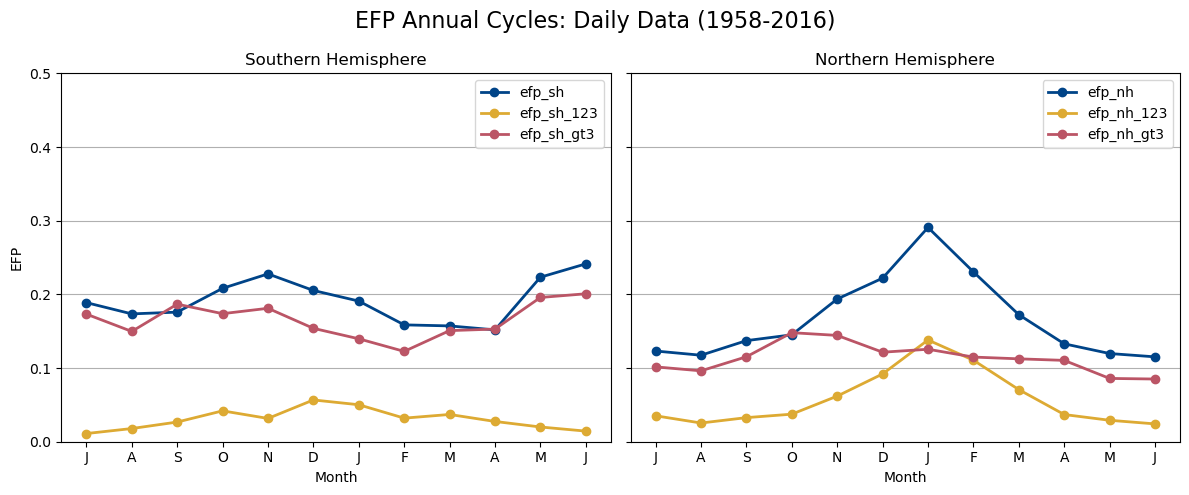

In [12]:
plot_efp_annual_cycle(data_daily_58, time_frequency="Daily")

## 1979-2016

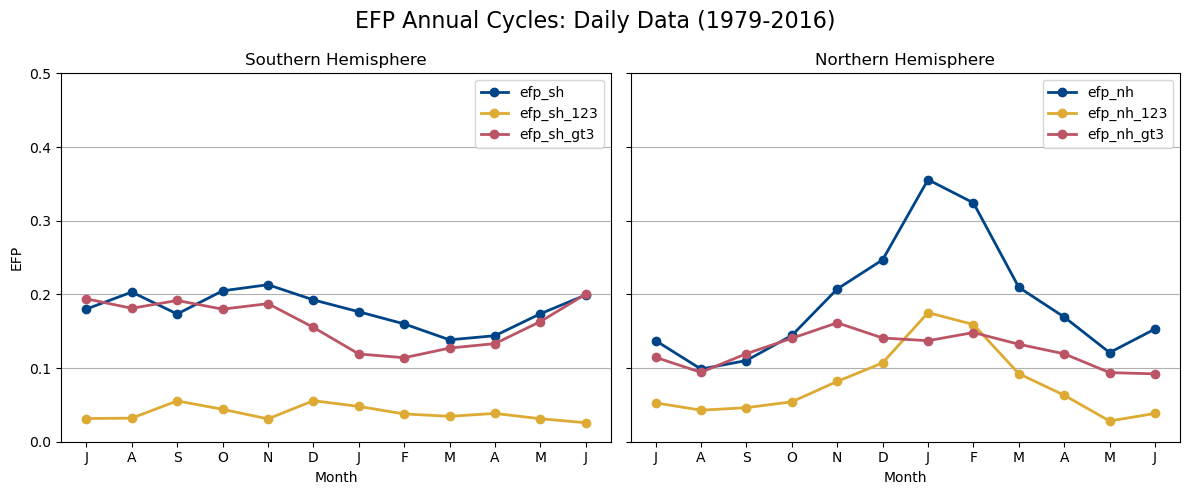

In [13]:
plot_efp_annual_cycle(data_daily_79, time_period='1979-2016', time_frequency="Daily")